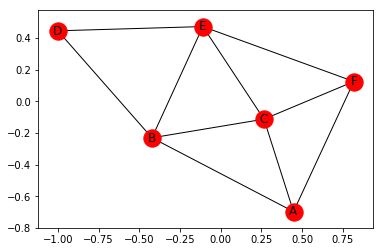

In [6]:
import networkx as nx
import operator

G = nx.Graph()
G.add_edges_from([('A','C'),
                 ('A','B'),
                 ('A','F'),
                 ('B','C'),
                 ('B','E'),
                 ('B','D'),
                 ('C','E'),
                 ('C','F'),
                 ('D','E'),
                 ('E','F')])
nx.draw_networkx(G)

In [24]:
degrees = G.degree()
degree_values = sorted(dict(G.degree()).values())
degree_values


[2, 3, 3, 4, 4, 4]

In [49]:
#value_list = [list(dict(G.degree()).values()).count(i)/float(nx.number_of_nodes(G))
#           for i in degree_values]
#answer1 = value_list[0] + value_list[1] + value_list[2]
#answer1
answer1 = (degree_values.count(2) + degree_values.count(3))/float(nx.number_of_nodes(G))
answer1

0.5

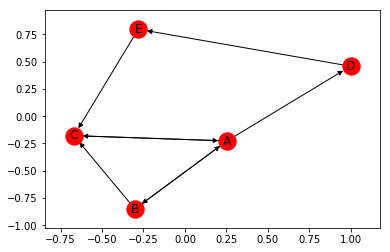

In [53]:
G_in = nx.DiGraph()
G_in.add_edges_from([('A','B'),
                    ('A','C'),
                    ('A','D'),
                    ('B','A'),
                    ('B','C'),
                    ('C','A'),
                    ('D','E'),
                    ('E','C')])
nx.draw_networkx(G_in)

In [56]:
answer2 = sorted(dict(G_in.in_degree()).values(), reverse = True)
answer2

[3, 2, 1, 1, 1]

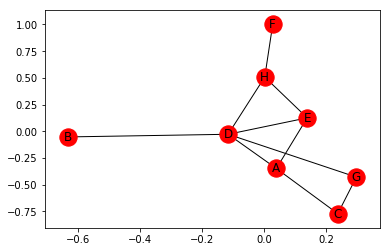

In [57]:
G_cn = nx.Graph()
G_cn.add_edges_from([('A','C'),
                    ('A','D'),
                    ('A','E'),
                    ('B','D'),
                    ('C','G'),
                    ('D','E'),
                    ('D','G'),
                     ('D','H'),
                    ('E','H'),
                    ('F','H')])
nx.draw_networkx(G_cn)

In [60]:
common_neigh = [(e[0],e[1], len(list(nx.common_neighbors(G_cn,e[0],e[1]))))
               for e in nx.non_edges(G_cn)]
sorted(common_neigh,key = operator.itemgetter(2),reverse = True)

[('D', 'C', 2),
 ('A', 'H', 2),
 ('A', 'G', 2),
 ('D', 'F', 1),
 ('A', 'B', 1),
 ('C', 'E', 1),
 ('E', 'F', 1),
 ('E', 'B', 1),
 ('E', 'G', 1),
 ('H', 'B', 1),
 ('H', 'G', 1),
 ('G', 'B', 1),
 ('A', 'F', 0),
 ('C', 'F', 0),
 ('C', 'B', 0),
 ('C', 'H', 0),
 ('F', 'B', 0),
 ('F', 'G', 0)]

In [61]:
answer7 = list(nx.jaccard_coefficient(G_cn))
answer7.sort(key=operator.itemgetter(2),reverse = True)
print(answer7)

[('A', 'G', 0.6666666666666666), ('A', 'H', 0.5), ('G', 'B', 0.5), ('D', 'C', 0.4), ('A', 'B', 0.3333333333333333), ('E', 'F', 0.3333333333333333), ('E', 'B', 0.3333333333333333), ('H', 'B', 0.3333333333333333), ('C', 'E', 0.25), ('E', 'G', 0.25), ('H', 'G', 0.25), ('D', 'F', 0.2), ('A', 'F', 0.0), ('C', 'F', 0.0), ('C', 'B', 0.0), ('C', 'H', 0.0), ('F', 'B', 0.0), ('F', 'G', 0.0)]


In [62]:
answer8 = list(nx.resource_allocation_index(G_cn))
answer8.sort(key=operator.itemgetter(2), reverse = True)
print(answer8)

[('D', 'C', 0.8333333333333333), ('A', 'G', 0.7), ('A', 'H', 0.5333333333333333), ('D', 'F', 0.3333333333333333), ('C', 'E', 0.3333333333333333), ('E', 'F', 0.3333333333333333), ('A', 'B', 0.2), ('E', 'B', 0.2), ('E', 'G', 0.2), ('H', 'B', 0.2), ('H', 'G', 0.2), ('G', 'B', 0.2), ('A', 'F', 0), ('C', 'F', 0), ('C', 'B', 0), ('C', 'H', 0), ('F', 'B', 0), ('F', 'G', 0)]


In [63]:
answer9 = list(nx.preferential_attachment(G_cn))
answer9.sort(key=operator.itemgetter(2), reverse=True)
print(answer9)

[('D', 'C', 10), ('A', 'H', 9), ('A', 'G', 6), ('C', 'H', 6), ('C', 'E', 6), ('E', 'G', 6), ('H', 'G', 6), ('D', 'F', 5), ('A', 'F', 3), ('A', 'B', 3), ('E', 'F', 3), ('E', 'B', 3), ('H', 'B', 3), ('C', 'F', 2), ('C', 'B', 2), ('F', 'G', 2), ('G', 'B', 2), ('F', 'B', 1)]


In [66]:
G_cn.node['A']['community'] = 0
G_cn.node['B']['community'] = 0
G_cn.node['C']['community'] = 0
G_cn.node['D']['community'] = 0
G_cn.node['G']['community'] = 0
G_cn.node['E']['community'] = 1
G_cn.node['F']['community'] = 1
G_cn.node['H']['community'] = 1
answer10_1 = list(nx.cn_soundarajan_hopcroft(G_cn))
answer10_1.sort(key=operator.itemgetter(2), reverse = True)
print(answer10)

[('D', 'C', 4), ('A', 'G', 4), ('A', 'B', 2), ('A', 'H', 2), ('E', 'F', 2), ('G', 'B', 2), ('D', 'F', 1), ('C', 'E', 1), ('E', 'B', 1), ('E', 'G', 1), ('H', 'B', 1), ('H', 'G', 1), ('A', 'F', 0), ('C', 'F', 0), ('C', 'B', 0), ('C', 'H', 0), ('F', 'B', 0), ('F', 'G', 0)]


In [67]:
answer10_2 = list(nx.ra_index_soundarajan_hopcroft(G_cn))
answer10_2.sort(key=operator.itemgetter(2),reverse = True)
print(answer10_2)

[('D', 'C', 0.8333333333333333), ('A', 'G', 0.7), ('E', 'F', 0.3333333333333333), ('A', 'B', 0.2), ('G', 'B', 0.2), ('D', 'F', 0), ('A', 'F', 0), ('A', 'H', 0), ('C', 'F', 0), ('C', 'B', 0), ('C', 'H', 0), ('C', 'E', 0), ('E', 'B', 0), ('E', 'G', 0), ('F', 'B', 0), ('F', 'G', 0), ('H', 'B', 0), ('H', 'G', 0)]
